### All team ID

In [1]:
#1       ANA Los Angeles Angels of Anaheim    LAA   AL
#2       ARI          Arizona Diamondbacks    ARI   NL
#3       ATL                Atlanta Braves    ATL   NL
#4       BAL             Baltimore Orioles    BAL   AL
#5       BOS                Boston Red Sox    BOS   AL
#6       CHC                  Chicago Cubs    CHN   NL
#7       CHW             Chicago White Sox    CHA   AL
#8       CIN               Cincinnati Reds    CIN   NL
#9       CLE             Cleveland Indians    CLE   AL
#10      COL              Colorado Rockies    COL   NL
#11      DET                Detroit Tigers    DET   AL
#12      FLA               Florida Marlins    MIA   NL`
#13      HOU                Houston Astros    HOU   AL
#14      KCR            Kansas City Royals    KCA   AL
#15      LAD           Los Angeles Dodgers    LAN   NL
#16      MIL             Milwaukee Brewers    MIL   NL
#17      MIN               Minnesota Twins    MIN   AL
#18      NYM                 New York Mets    NYN   NL
#19      NYY              New York Yankees    NYA   AL
#20      OAK             Oakland Athletics    OAK   AL
#21      PHI         Philadelphia Phillies    PHI   NL
#22      PIT            Pittsburgh Pirates    PIT   NL
#23      SDP              San Diego Padres    SDN   NL
#24      SEA              Seattle Mariners    SEA   AL
#25      SFG          San Francisco Giants    SFN   NL
#26      STL           St. Louis Cardinals    SLN   NL
#27      TBD                Tampa Bay Rays    TBA   AL
#28      TEX                 Texas Rangers    TEX   AL
#29      TOR             Toronto Blue Jays    TOR   AL
#30      WSN          Washington Nationals    WAS   NL

team_ID = ['LAA','ARI','ATL','BAL','BOS','CHN',
           'CHA','CIN','CLE','COL','DET','MIA',
           'HOU','KCA','LAN','MIL','MIN','NYN',
           'NYA','OAK','PHI','PIT','SDN','SEA',
           'SFN','SLN','TBA','TEX','TOR','WAS']

### Loading Packages & Data

In [2]:
# import packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from seaborn import regplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans

In [4]:
# loading datas
Batting     = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Batting.csv');
People      = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\People.csv');
Salaries    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Salaries.csv');
Appearances = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Appearances.csv');
Fielding    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Fielding.csv');
HallOfFame  = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\HallOfFame.csv');
Pitching    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Pitching.csv');
team        = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Teams.csv');
#ibs         = pd.read_csv('ibs819.csv').drop('Unnamed: 0',axis=1);
#cbs         = pd.read_csv('cbs819.csv').drop('Unnamed: 0',axis=1);

### Other statistics

In [5]:
# adjust data
field = Fielding.fillna(0)
bat  = Batting.fillna(0)
pitch = Pitching.fillna(0)
salary = Salaries[Salaries['salary']!=0].reset_index().drop('index',axis=1)

In [6]:
# AVG
def avg(batting_mlb):
    Batters = batting_mlb;
    H = np.array(Batters['H']);
    AB = np.array(Batters['AB']);
    AVG = H/AB;
    return AVG

In [7]:
# Runs Created
def runs_created(batting_mlb):
    Batters = batting_mlb;
    ABH     = np.array(Batters['AB'])+np.array(Batters['BB'])+np.array(Batters['HBP'])
    hBH     = np.array(Batters['BB'])+np.array(Batters['HBP'])+np.array(Batters['H'])
    TB      = np.array(Batters['H'])+np.array(Batters['2B'])+2*np.array(Batters['3B'])+3*np.array(Batters['HR'])
    RC      = (np.nan_to_num(hBH.T*TB/ABH))
    return RC

In [8]:
# OBP = H+BB+HBP/AB+BB+SF+HBP
def obp(batting_mlb):
    Batters = batting_mlb;
    obp = (np.array(Batters['H'])+np.array(Batters['HBP'])+np.array(Batters['BB']))/(np.array(Batters['AB'])+np.array(Batters['BB'])+np.array(Batters['SF'])+np.array(Batters['HBP']))
    return obp

In [9]:
# SLG = TB/AB
def slg(batting_mlb):
    Batters = batting_mlb;
    TB      = np.array(Batters['H'])+np.array(Batters['2B'])+2*np.array(Batters['3B'])+3*np.array(Batters['HR'])
    tb      = TB/np.array(Batters['AB'])
    return tb

In [9]:
# wOBA
def woba(batting_mlb):
    Batters = batting_mlb;
    ABH     = np.array(Batters['AB'])+np.array(Batters['BB'])-np.array(Batters['IBB'])+np.array(Batters['SF'])+np.array(Batters['HBP'])
    hBH     = (.69*(np.array(Batters['BB'])-np.array(Batters['IBB'])))+.72*np.array(Batters['HBP'])+.88*(np.array(Batters['H'])-np.array(Batters['2B'])-np.array(Batters['3B'])-np.array(Batters['HR']))+1.247*np.array(Batters['2B'])+1.578*np.array(Batters['3B'])+2.301*np.array(Batters['HR'])
    woba      = np.nan_to_num(hBH/ABH)
    return woba

### Search function

In [10]:
# define search function
def search(data,y_i=None,y_f=None,teamID=None,playerID=None):  
    if type(y_i)!=int:
        data1=data
    else:data1 = data[data['yearID']>=y_i];
    if type(y_f)!=int:
        data1=data1
    else:data1= data1[data1['yearID']<=y_f];
    if type(playerID)!=str:
        data2=data1
    else:data2 = data1[data1['playerID']==playerID];
    if type(teamID)!=str:
        data3=data2
    else:data3 = data2[data2['teamID']==teamID];
    return data3

### Team Asset

In [11]:
# every year all team assets
tt = []
for i in range(1985,2017):
    r = search(salary,y_i=i,y_f=i)
    for j in r.drop_duplicates(subset=['teamID'])['teamID']:
        tt.append([i,j,sum(search(r,teamID=j)['salary'])])
tts = pd.DataFrame(tt)
tts = tts.rename(columns={0:'yearID',1:'teamID',2:'asset'})
tts

,yearID,teamID,asset
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
...,...,...,...
913,2016,SLN,143053500
914,2016,TBA,57097310
915,2016,TEX,176038723
916,2016,TOR,138701700


<BarContainer object of 12 artists>

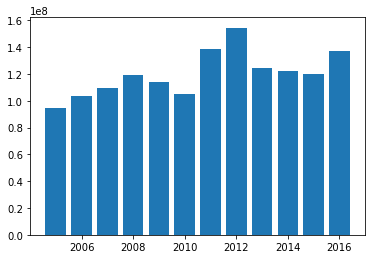

In [12]:
y = 1985,2018
load = search(tts,y_i=y[0],y_f=y[1],teamID='LAA')
plt.bar(load['yearID'],load['asset'])

### Salary Adjust

In [13]:
# all season for target, focus on salary between each features, first select from salary player list.
# salary_adjust preprocessing by minmaxscaler/StandardScaler, for adjust every season's salary difference.

mm = MinMaxScaler()
target = pd.DataFrame()
for i in range(1985,2017):
    t = search(salary,y_i=i,y_f=i).reset_index().drop('index',axis=1)
    x = mm.fit_transform((t[['salary']]))
    t.insert(5,'salary_adjust',x)
    target = pd.concat([target,t])

In [14]:
# describe salary table distribution
target.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,26426.0,2.000879e+03,8.909512e+00,1985.0,1994.000000,2001.000000,2.009000e+03,2016.0
salary,26426.0,2.085792e+06,3.455431e+06,10900.0,295000.000000,550000.000000,2.350000e+06,33000000.0
salary_adjust,26426.0,1.208875e-01,1.750435e-01,0.0,0.002752,0.035112,1.720074e-01,1.0


26426


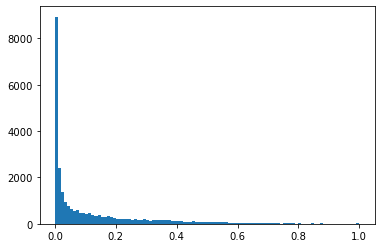

In [15]:
plt.hist(target['salary_adjust'],bins=100)
print(len(target))

In [16]:
# salary skewness
skew(target['salary_adjust'])

1.9543518094611478

(array([17147.,  3445.,  1991.,  1525.,   941.,   634.,   350.,   202.,
          112.,    79.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

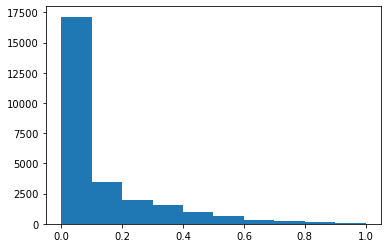

In [17]:
plt.hist(target['salary_adjust'])

In [28]:
bat[bat['stint']>1]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
120,allisdo01,1872,2,BR1,0,18,83,18,28,2,...,4.0,0.0,0.0,1,5.0,0.0,0.0,0.0,0.0,0.0
137,boothed01,1872,2,BR2,0,15,62,10,19,4,...,7.0,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,1.0
140,brainas01,1872,2,MID,0,6,25,2,5,0,...,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
168,forceda01,1872,2,BL1,0,19,95,29,41,2,...,14.0,5.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
172,gedneco01,1872,2,BR1,0,18,71,5,13,1,...,6.0,2.0,2.0,0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108705,vogelda01,2020,2,TOR,AL,2,4,0,0,0,...,0.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0
108706,vogelda01,2020,3,MIL,NL,19,58,13,19,2,...,12.0,0.0,0.0,8,18.0,0.0,1.0,0.0,0.0,2.0
108723,walketa01,2020,2,TOR,AL,6,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108752,willita01,2020,2,SDN,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
search(bat,playerID='travide01')#,y_i=2020,y_f=2020

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101223,travide01,2015,1,TOR,AL,62,217,38,66,18,...,35.0,3.0,1.0,18,43.0,0.0,2.0,0.0,1.0,4.0
102708,travide01,2016,1,TOR,AL,101,410,54,123,28,...,50.0,4.0,1.0,20,87.0,0.0,0.0,1.0,1.0,6.0
104190,travide01,2017,1,TOR,AL,50,185,22,48,18,...,24.0,4.0,2.0,7,38.0,0.0,2.0,1.0,2.0,5.0
105715,travide01,2018,1,TOR,AL,103,357,41,83,14,...,44.0,3.0,2.0,16,64.0,1.0,5.0,0.0,0.0,8.0


In [31]:
search(ibs,playerID='gedneco01')#,y_i=1872,y_f=1872

,playerID,yearID,seniority,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,salary,salary_rank,age


In [20]:
ibs = ibs.rename(columns={'stint':'seniority'})

In [21]:
ibs

,playerID,yearID,seniority,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,salary,salary_rank,age
0,benedbr01,1985,8,ATL,NL,70,208,12,42,6,...,22,12,1,1,4,2,8,545000.0,2,30
1,benedbr01,1986,9,ATL,NL,64,160,11,36,10,...,15,10,1,2,4,1,9,565000.0,1,31
2,benedbr01,1987,10,ATL,NL,37,95,4,14,1,...,17,15,0,0,2,0,2,615000.0,2,32
3,benedbr01,1988,11,ATL,NL,90,236,11,57,7,...,19,26,1,0,5,2,2,665000.0,2,33
4,benedbr01,1989,12,ATL,NL,66,160,12,31,3,...,23,18,4,1,2,0,1,395000.0,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17628,carreez01,2017,7,TOR,AL,131,287,38,81,10,...,30,75,0,3,5,0,4,0.0,0,30
17629,travide01,2015,1,TOR,AL,62,217,38,66,18,...,18,43,0,2,0,1,4,0.0,0,24
17630,travide01,2016,2,TOR,AL,101,410,54,123,28,...,20,87,0,0,1,1,6,511200.0,0,25
17631,travide01,2017,3,TOR,AL,50,185,22,48,18,...,7,38,0,2,1,2,5,0.0,0,26


In [22]:
ibs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
playerID,17633,2043,vizquom01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearID,17633.0,NaN,NaN,NaN,2002.031362,9.805012,1985.0,1994.0,2002.0,2010.0,2020.0
seniority,17633.0,NaN,NaN,NaN,6.568933,4.268937,1.0,3.0,6.0,9.0,25.0
teamID,17633,35,LAN,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lgID,17633,2,NL,8895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,17633.0,NaN,NaN,NaN,89.955311,48.767913,1.0,48.0,96.0,134.0,163.0
AB,17633.0,NaN,NaN,NaN,288.408269,194.34126,0.0,113.0,269.0,462.0,716.0
R,17633.0,NaN,NaN,NaN,39.400045,31.168252,0.0,12.0,33.0,62.0,152.0
H,17633.0,NaN,NaN,NaN,76.640107,56.452996,0.0,26.0,68.0,123.0,262.0
2B,17633.0,NaN,NaN,NaN,14.852946,11.817074,0.0,5.0,13.0,23.0,59.0


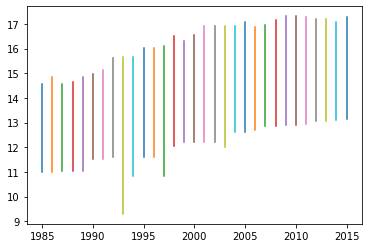

In [23]:
for i in range(1985,2016):
    plt.plot((i,i),(np.log(min(search(salary,y_i=i,y_f=i)['salary'])),np.log(max(search(salary,y_i=i,y_f=i)['salary']))))

9112


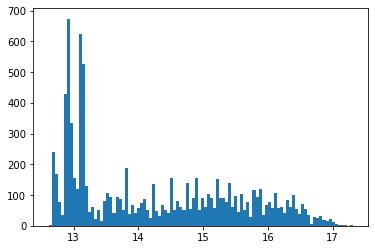

In [24]:
plt.hist(np.log(search(salary,y_i=2005,y_f=2015)['salary']),bins=100)
print(len(search(salary,y_i=2005,y_f=2015)))

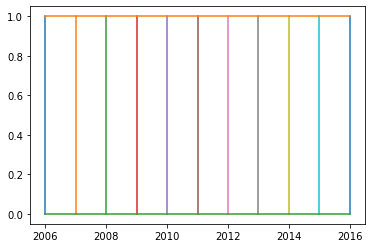

In [25]:
for i in range(2006,2017):
    plt.plot((i,i),((min(search(target,y_i=i,y_f=i)['salary_adjust'])),(max(search(target,y_i=i,y_f=i)['salary_adjust']))))
plt.plot((2006,2016),(1,1))
plt.plot((2006,2016),(0,0))

In [41]:
kk = kk.drop('salary_adjust',axis=1)
kk

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,age,teamID,lgID,salary
0,benedbr01,1985,8,70,208,12,42,6,0,0,...,12,1,1,4,2,8,30,ATL,NL,545000
1,benedbr01,1986,9,64,160,11,36,10,1,0,...,10,1,2,4,1,9,31,ATL,NL,565000
2,benedbr01,1987,10,37,95,4,14,1,0,1,...,15,0,0,2,0,2,32,ATL,NL,615000
3,benedbr01,1988,11,90,236,11,57,7,0,0,...,26,1,0,5,2,2,33,ATL,NL,665000
4,benedbr01,1989,12,66,160,12,31,3,0,1,...,18,4,1,2,0,1,34,ATL,NL,395000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13148,casalcu01,2016,3,84,226,23,42,10,0,8,...,82,1,2,3,0,2,28,TBA,AL,513600
13149,alberha01,2016,2,35,56,2,8,1,0,0,...,17,0,0,2,0,1,24,TEX,AL,511500
13150,deshide02,2016,2,74,182,36,38,7,0,4,...,54,0,2,3,1,1,24,TEX,AL,517300
13151,carreez01,2016,6,110,270,47,67,9,1,6,...,70,0,4,7,2,8,29,TOR,AL,521800


In [46]:
# all season for target, focus on salary between each features, first select from salary player list.
# salary_adjust preprocessing by minmaxscaler/StandardScaler, for adjust every season's salary difference.

mm = MinMaxScaler()
tt = pd.DataFrame()
for i in range(1985,2017):
    t = search(kk,y_i=i,y_f=i)#.reset_index().drop('index',axis=1)
    x = mm.fit_transform((t[['salary']]))
    t.insert(len(t.columns),'salary_adjust',x)
    tt = pd.concat([tt,t])

In [47]:
tt

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,GIDP,age,teamID,lgID,salary,salary_adjust
0,benedbr01,1985,8,70,208,12,42,6,0,0,...,1,1,4,2,8,30,ATL,NL,545000,0.234266
5,ceronri01,1985,11,96,282,15,61,9,0,3,...,1,1,0,4,15,31,ATL,NL,625000,0.272907
13,chambch01,1985,15,101,170,16,40,7,0,3,...,4,0,0,1,5,37,ATL,NL,800000,0.357436
15,harpete01,1985,6,138,492,58,130,15,2,17,...,4,3,1,2,13,30,ATL,NL,250000,0.091774
18,hornebo01,1985,8,130,483,61,129,25,3,27,...,4,1,0,6,18,28,ATL,NL,1500000,0.695551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13148,casalcu01,2016,3,84,226,23,42,10,0,8,...,1,2,3,0,2,28,TBA,AL,513600,0.000222
13149,alberha01,2016,2,35,56,2,8,1,0,0,...,0,0,2,0,1,24,TEX,AL,511500,0.000145
13150,deshide02,2016,2,74,182,36,38,7,0,4,...,0,2,3,1,1,24,TEX,AL,517300,0.000356
13151,carreez01,2016,6,110,270,47,67,9,1,6,...,0,4,7,2,8,29,TOR,AL,521800,0.000520


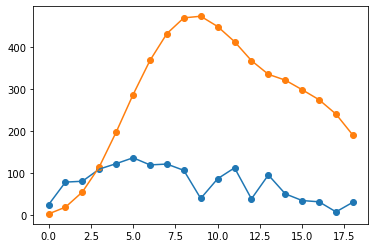

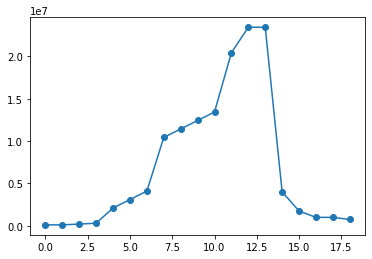

(0.6678675768790215, 0.0017786009414589542)

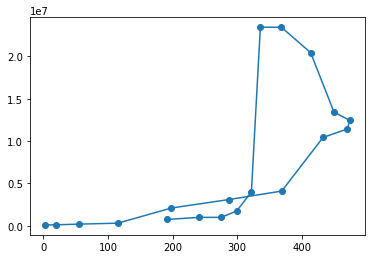

In [39]:
w = 8
wt = 'triang'
n = ['giambja01','rodrial01','griffke02'][0]
g = ibs[ibs['playerID']==n].merge(salary[salary['playerID']==n])
plt.plot([i for i in range(len(g))],g['RBI'])
plt.scatter([i for i in range(len(g))],g['RBI'])
g.rolling(window=w,min_periods=1,win_type=wt).sum()['RBI'].plot()
plt.scatter([i for i in range(len(g))],g.rolling(window=w,min_periods=1,win_type=wt).sum()['RBI'])
plt.show()
plt.plot([i for i in range(len(g))],g['salary'])
plt.scatter([i for i in range(len(g))],g['salary'])
plt.show()
plt.plot(g.rolling(window=w,min_periods=1,win_type=wt).sum()['RBI'],(g['salary']))
plt.scatter(g.rolling(window=w,min_periods=1,win_type=wt).sum()['RBI'],(g['salary']))
stats.pearsonr(g.rolling(window=w,min_periods=1,win_type=wt).sum()['RBI'].fillna(0),(g['salary']))

In [32]:
cud_ = pd.read_csv('cud_.csv').drop_duplicates(subset=['playerID','yearID']).drop('Unnamed: 0',axis=1)

In [50]:
r = target.copy()
r['yearID']=r['yearID']-1

In [51]:
kk = cbs.copy()
kk = kk.drop(['salary','salary_rank','teamID','lgID'],axis=1)
kk = kk.merge(r)


In [30]:
kk

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,age,teamID,lgID,salary,salary_adjust,cp
0,benedbr01,1985,8,725,2227,176,558,77,5,16,...,10,36,18,62,30,ATL,NL,545000,0.234266,0.000398
1,benedbr01,1986,9,789,2387,187,594,87,6,16,...,12,40,19,71,31,ATL,NL,565000,0.184307,0.000407
2,benedbr01,1987,10,826,2482,191,608,88,6,17,...,12,42,19,73,32,ATL,NL,615000,0.267576,0.000382
3,benedbr01,1988,11,916,2718,202,665,95,6,17,...,12,47,21,75,33,ATL,NL,665000,0.264544,0.000382
4,benedbr01,1989,12,982,2878,214,696,98,6,18,...,13,49,21,76,34,ATL,NL,395000,0.122958,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13148,casalcu01,2016,3,152,399,46,78,19,0,18,...,6,6,1,6,28,TBA,AL,513600,0.000188,0.000090
13149,alberha01,2016,2,76,155,14,30,3,1,0,...,0,5,0,3,24,TEX,AL,511500,0.000123,0.000018
13150,deshide02,2016,2,195,607,119,149,29,10,6,...,5,10,5,2,24,TEX,AL,517300,0.000302,0.000097
13151,carreez01,2016,6,377,877,136,224,35,8,11,...,11,21,5,19,29,TOR,AL,521800,0.000440,0.000148


In [54]:
bat[bat['playerID']=='rodrial01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
72660,rodrial01,1994,1,SEA,AL,17,54,4,11,0,...,2.0,3.0,0.0,3,20.0,0.0,0.0,1.0,1.0,0.0
73861,rodrial01,1995,1,SEA,AL,48,142,15,33,6,...,19.0,4.0,2.0,6,42.0,0.0,0.0,1.0,0.0,0.0
75119,rodrial01,1996,1,SEA,AL,146,601,141,215,54,...,123.0,15.0,4.0,59,104.0,1.0,4.0,6.0,7.0,15.0
76369,rodrial01,1997,1,SEA,AL,141,587,100,176,40,...,84.0,29.0,6.0,41,99.0,1.0,5.0,4.0,1.0,14.0
77656,rodrial01,1998,1,SEA,AL,161,686,123,213,35,...,124.0,46.0,13.0,45,121.0,0.0,10.0,3.0,4.0,12.0
78969,rodrial01,1999,1,SEA,AL,129,502,110,143,25,...,111.0,21.0,7.0,56,109.0,2.0,5.0,1.0,8.0,12.0
80322,rodrial01,2000,1,SEA,AL,148,554,134,175,34,...,132.0,15.0,4.0,100,121.0,5.0,7.0,0.0,11.0,10.0
81688,rodrial01,2001,1,TEX,AL,162,632,133,201,34,...,135.0,18.0,3.0,75,131.0,6.0,16.0,0.0,9.0,17.0
83011,rodrial01,2002,1,TEX,AL,162,624,125,187,27,...,142.0,9.0,4.0,87,122.0,12.0,10.0,0.0,4.0,14.0
84341,rodrial01,2003,1,TEX,AL,161,607,124,181,30,...,118.0,17.0,3.0,87,126.0,10.0,15.0,0.0,6.0,16.0


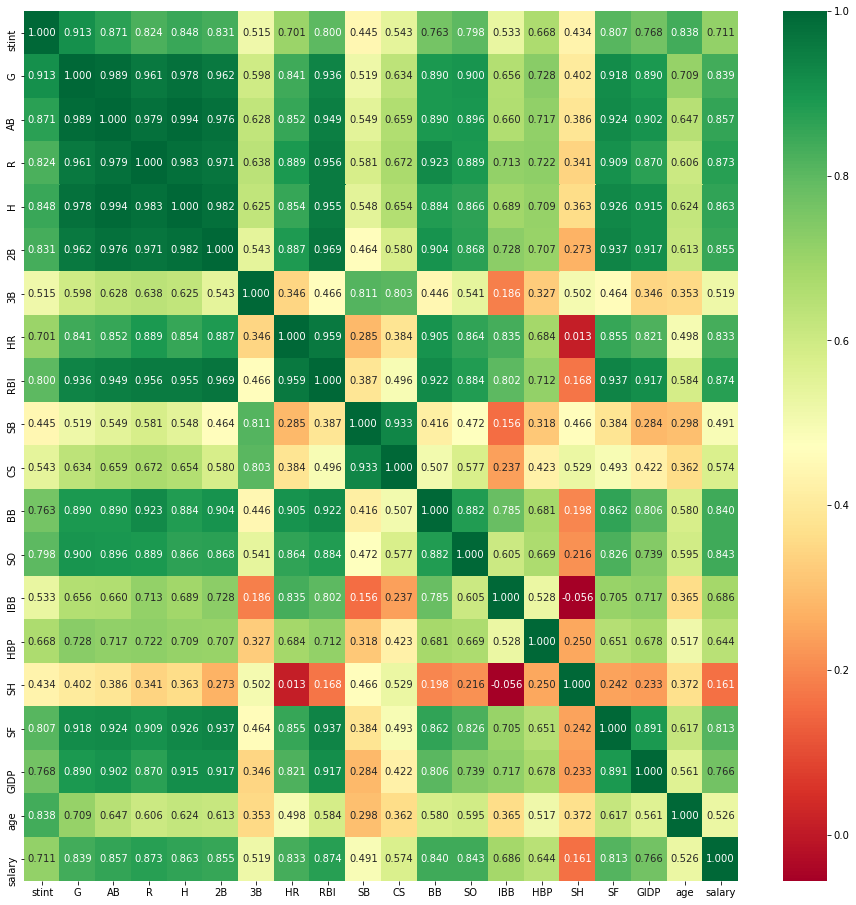

In [37]:
plt.figure(figsize=(16,16))
f = cud_.copy().drop(['playerID','salary_rank'],axis=1).reindex(columns=['stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'age', 'salary'])
sns.heatmap(f.corr(), annot=True, 
            annot_kws={"size": 10}, fmt=".3f", cmap="RdYlGn")#.get_figure().savefig('heatmap')

In [45]:
uu = pd.DataFrame()
for i in cbs[cbs['yearID']>=2010].drop_duplicates(subset=['playerID'])['playerID']:
    (search(cbs,playerID=i))

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,salary,salary_rank,age
0,beltrad01,1998,1,LAN,NL,77,195,18,42,9,...,14,37,0,3,2,0,4,220000,0,19
1,beltrad01,1999,2,LAN,NL,229,733,102,190,36,...,75,142,12,9,6,5,8,1000000,0,20
2,beltrad01,2000,3,LAN,NL,367,1243,173,338,66,...,131,222,14,11,9,9,21,1250000,0,21
3,beltrad01,2001,4,LAN,NL,493,1718,232,464,88,...,159,304,15,16,11,14,30,2800000,0,22
4,beltrad01,2002,5,LAN,NL,652,2305,302,615,114,...,196,400,19,20,12,20,47,3700000,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,lawribr01,2011,1,TOR,AL,43,150,26,44,8,...,16,31,1,3,2,0,0,482500,0,21
4676,lawribr01,2012,2,TOR,AL,168,644,99,179,34,...,49,117,1,8,4,2,9,500000,0,22
4677,lawribr01,2013,3,TOR,AL,275,1045,140,281,52,...,79,185,2,15,5,5,17,516100,0,23
4678,lawribr01,2014,4,TOR,AL,345,1304,167,345,61,...,95,234,2,20,5,7,17,1925000,0,24


In [79]:
r[r['playerID']=='rodrial01']

,yearID,teamID,lgID,playerID,salary,salary_adjust
753,1993,SEA,AL,rodrial01,442333,0.062773
833,1994,SEA,AL,rodrial01,442333,0.036516
788,1995,SEA,AL,rodrial01,442334,0.036516
777,1996,SEA,AL,rodrial01,1062500,0.101759
830,1997,SEA,AL,rodrial01,2162500,0.134932
833,1998,SEA,AL,rodrial01,3112500,0.247877
696,1999,SEA,AL,rodrial01,4362500,0.268301
824,2000,TEX,AL,rodrial01,22000000,1.000000
807,2001,TEX,AL,rodrial01,22000000,1.000000
790,2002,TEX,AL,rodrial01,22000000,1.000000


In [109]:
kk[kk['playerID']=='rodrial01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,GIDP,age,teamID,lgID,salary,salary_adjust
5901,rodrial01,1994,1,17,54,4,11,0,0,0,...,0,0,1,1,0,19,SEA,AL,442333,0.036516
5902,rodrial01,1995,2,48,142,15,33,6,2,5,...,0,0,1,0,0,20,SEA,AL,442334,0.036516
5903,rodrial01,1996,3,146,601,141,215,54,1,36,...,1,4,6,7,15,21,SEA,AL,1062500,0.101759
5904,rodrial01,1997,4,141,587,100,176,40,3,23,...,1,5,4,1,14,22,SEA,AL,2162500,0.134932
5905,rodrial01,1998,5,161,686,123,213,35,5,42,...,0,10,3,4,12,23,SEA,AL,3112500,0.247877
5906,rodrial01,1999,6,129,502,110,143,25,0,42,...,2,5,1,8,12,24,SEA,AL,4362500,0.268301
5907,rodrial01,2000,7,148,554,134,175,34,2,41,...,5,7,0,11,10,25,TEX,AL,22000000,1.000000
5908,rodrial01,2001,8,162,632,133,201,34,1,52,...,6,16,0,9,17,26,TEX,AL,22000000,1.000000
5909,rodrial01,2002,9,162,624,125,187,27,2,57,...,12,10,0,4,14,27,TEX,AL,22000000,1.000000
5910,rodrial01,2003,10,161,607,124,181,30,6,47,...,10,15,0,6,16,28,NYA,AL,22000000,0.977477
